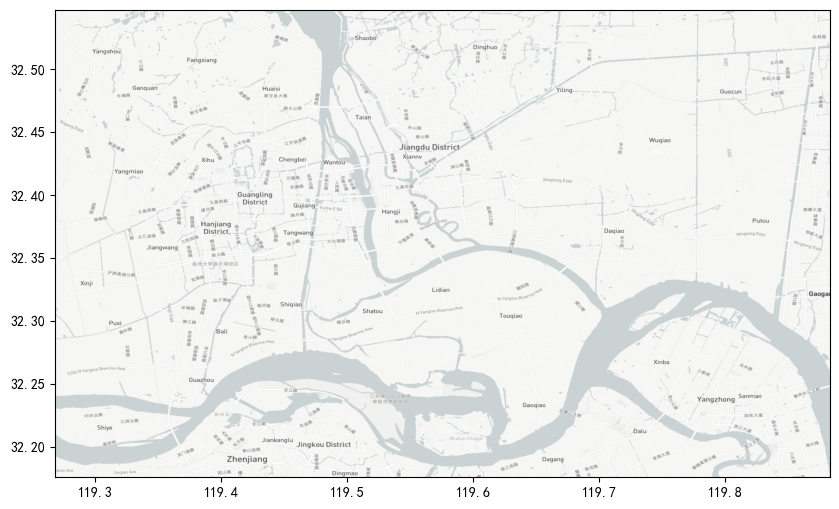

In [1]:
# 一、读取底图
# 1.导入需要的包
#geopandas包
import geopandas
import plot_map
import transbigdata as tbd
import matplotlib as mpl
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,10),dpi = 100)
ax = plt.subplot(111)
plt.rcParams['font.sans-serif']=['SimHei']   #设置中文字体
tbd.plot_map(plt,bounds=[119.3,32.2,119.8,32.5],zoom=12,style=4)   #设置底图
#shapely包
#from shapely.geometry import Point,Polygon,shape
#shp = r'F:\data\扬州公交\TEST1\扬州/扬州.shp'
#hz = geopandas.GeoDataFrame.from_file(shp,encoding = 'utf-8')
#plt.plot()

In [2]:
xianlu=1001
checi=0
m=3

In [3]:
# 二、读取站点坐标
import pandas as pd
#文件路径
file_path = r'F:\data\扬州公交\stop_5_6\1001.csv'
district= pd.read_csv(file_path)
district2=district.loc[:,['STATIONNO','LONGITUDE','LATITUDE','STATIONNAME']]
district2

,STATIONNO,LONGITUDE,LATITUDE,STATIONNAME
0,104722,119.452999,32.365634,汤汪花园
1,104692,119.448762,32.363876,连运小区南
2,104724,119.451591,32.365145,汤汪花园
3,107293,119.365050,32.393808,文化艺术中心
4,106814,119.358411,32.390665,体育公园
...,...,...,...,...
58,127031,119.466856,32.369664,亚联公交停车场
59,107723,119.427810,32.391566,仙鹤寺
60,117234,119.444038,32.362146,连运路渡江南路
61,117232,119.443465,32.361727,连运路渡江南路


In [4]:

file_path = r'F:\data\扬州公交\stop_5_6\1001.csv'
district= pd.read_csv(file_path)
OD=pd.read_excel(r'F:\data\扬州公交\手机信令梳理\5月6号\\'+str(xianlu)+'\\'+str(checi)+'\\'+'站点OD流量'+str(m)+'.xlsx')
OD

,Unnamed: 0.1,Unnamed: 0,O编号,出发站,出发时间,D编号,到达站,到达时间,出发站编号,到达站编号,出发人数,到达人数,出发站车辆到站时间,到达站车辆到站时间,OD
0,0,0,wtubjxw,育才小学,09:05-09:10,wtubkfj,紫薇苑,09:30-09:35,109022,109574,1,2,9:05:09,9:24:42,7
1,1,1,wtubn7b,汤汪花园,08:50-08:55,wtubm9w,仙鹤寺,09:05-09:10,104722,107721,1,40,8:45:58,9:09:53,27
2,2,2,wtubjgm,渡江南路连运西路,08:35-08:40,wtubm9w,仙鹤寺,09:00-09:05,104693,107721,1,39,8:52:34,9:09:53,1
3,3,3,wtubn55,连运小区南,08:50-08:55,wtubkcx,扬州友好医院,09:15-09:20,104692,108452,1,1,8:47:29,9:23:20,17
4,4,4,wtubjxw,育才小学,09:10-09:15,wtubk0e,体育公园,09:50-09:55,109022,106814,1,7,9:05:09,9:41:06,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,89,89,wtubn50,连运路渡江南路,08:50-08:55,wtubjzk,福运门,09:00-09:05,117232,101753,1,25,8:50:49,9:02:43,5
64,90,90,wtubn50,连运路渡江南路,08:35-08:40,wtubm1e,石桥,09:20-09:25,117232,106014,1,3,8:50:49,9:20:45,5
65,91,91,wtubn5t,汤汪花园,08:45-08:50,wtubm1y,石桥,09:05-09:10,104724,106012,1,22,8:46:33,9:20:35,27
66,92,92,wtubjzk,福运门,09:25-09:30,wtubm3u,扬大师院,09:30-09:35,101753,108223,1,3,9:02:43,9:17:15,2


In [5]:
# 四、连接两个表格
district2.columns = ['出发站编号','O_x','O_y','STATIONNAME']
data = pd.merge(OD,district2,on = ['出发站编号'],how='left')
district2.columns = ['到达站编号','D_x','D_y','STATIONNAME']
data= pd.merge(data,district2,on = ['到达站编号'],how='left')
data

,Unnamed: 0.1,Unnamed: 0,O编号,出发站,出发时间,D编号,到达站,到达时间,出发站编号,到达站编号,...,到达人数,出发站车辆到站时间,到达站车辆到站时间,OD,O_x,O_y,STATIONNAME_x,D_x,D_y,STATIONNAME_y
0,0,0,wtubjxw,育才小学,09:05-09:10,wtubkfj,紫薇苑,09:30-09:35,109022,109574,...,2,9:05:09,9:24:42,7,119.430788,32.385973,育才小学,119.394083,32.398826,紫薇苑
1,1,1,wtubn7b,汤汪花园,08:50-08:55,wtubm9w,仙鹤寺,09:05-09:10,104722,107721,...,40,8:45:58,9:09:53,27,119.452999,32.365634,汤汪花园,119.427924,32.392308,仙鹤寺
2,2,2,wtubjgm,渡江南路连运西路,08:35-08:40,wtubm9w,仙鹤寺,09:00-09:05,104693,107721,...,39,8:52:34,9:09:53,1,119.442615,32.362189,渡江南路连运西路,119.427924,32.392308,仙鹤寺
3,3,3,wtubn55,连运小区南,08:50-08:55,wtubkcx,扬州友好医院,09:15-09:20,104692,108452,...,1,8:47:29,9:23:20,17,119.448762,32.363876,连运小区南,119.401150,32.398690,扬州友好医院
4,4,4,wtubjxw,育才小学,09:10-09:15,wtubk0e,体育公园,09:50-09:55,109022,106814,...,7,9:05:09,9:41:06,7,119.430788,32.385973,育才小学,119.358411,32.390665,体育公园
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,89,89,wtubn50,连运路渡江南路,08:50-08:55,wtubjzk,福运门,09:00-09:05,117232,101753,...,25,8:50:49,9:02:43,5,119.443465,32.361727,连运路渡江南路,119.437070,32.382055,福运门
64,90,90,wtubn50,连运路渡江南路,08:35-08:40,wtubm1e,石桥,09:20-09:25,117232,106014,...,3,8:50:49,9:20:45,5,119.443465,32.361727,连运路渡江南路,119.405285,32.398953,石桥
65,91,91,wtubn5t,汤汪花园,08:45-08:50,wtubm1y,石桥,09:05-09:10,104724,106012,...,22,8:46:33,9:20:35,27,119.451591,32.365145,汤汪花园,119.406082,32.398997,石桥
66,92,92,wtubjzk,福运门,09:25-09:30,wtubm3u,扬大师院,09:30-09:35,101753,108223,...,3,9:02:43,9:17:15,2,119.437070,32.382055,福运门,119.418414,32.398138,扬大师院


In [6]:
TIME= pd.read_csv(r'F:\data\扬州公交\手机信令梳理\5月6号\1001\1\1_line.csv',encoding='utf-8')#默认第一行是表头，所有栅格地图匹配后
TIME

,Unnamed: 0,DATATYPE,ROUTEID,SUBROUTEID,PRODUCTID,STATIONSEQNUM,STATIONNUM,ISARRLFT,ACTDATETIME,RECDATETIME,...,lats,geometry,project,geometry_orgin,diff,time_st,ROTATIONANGLE1,PRODUCTID1,flag,changedir
0,473,3,1001,1001,51402458,38.0,127031.0,NaN,2021/5/6 6:09:53,2021/5/6 6:09:45,...,3.586956e+06,POINT (167511.7911157607 3586956.1210855693),178.550869,POINT (167510.92860050726 3586955.8031767043),0.919238,22185,337.0,51402458.0,False,1229
1,474,3,1001,1001,51402458,38.0,127031.0,NaN,2021/5/6 6:09:58,2021/5/6 6:09:50,...,3.586997e+06,POINT (167496.7458297978 3586997.14338678),222.245172,POINT (167496.7434480667 3586997.1425152565),0.002536,22190,1.0,51402446.0,True,1239
2,475,3,1001,1001,51402458,38.0,127031.0,NaN,2021/5/6 6:09:58,2021/5/6 6:09:50,...,3.586997e+06,POINT (167496.7458297978 3586997.14338678),222.245172,POINT (167496.7434480667 3586997.1425152565),0.002536,22190,340.0,51402458.0,False,1239
3,476,3,1001,1001,51402458,38.0,127031.0,NaN,2021/5/6 6:10:03,2021/5/6 6:09:55,...,3.587042e+06,POINT (167480.90917701682 3587042.3247127943),270.122998,POINT (167481.18041367887 3587042.414576701),0.285736,22195,207.0,51402436.0,True,1254
4,477,3,1001,1001,51402458,38.0,127031.0,NaN,2021/5/6 6:10:03,2021/5/6 6:09:55,...,3.587042e+06,POINT (167480.90917701682 3587042.3247127943),270.122998,POINT (167481.18041367887 3587042.414576701),0.285736,22195,338.0,51402458.0,False,1254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,1958,3,1001,1001,51402458,72.0,108074.0,NaN,2021/5/6 7:05:33,2021/5/6 7:05:25,...,3.589386e+06,POINT (156292.9444752456 3589386.59879178),18107.348718,POINT (156293.07676032942 3589385.8230053717),0.786984,25525,246.0,51402437.0,True,19405
1486,1959,3,1001,1001,51402458,72.0,108074.0,NaN,2021/5/6 7:05:33,2021/5/6 7:05:25,...,3.589386e+06,POINT (156292.9444752456 3589386.59879178),18107.348718,POINT (156293.07676032942 3589385.8230053717),0.786984,25525,66.0,51402450.0,True,19413
1487,1960,3,1001,1001,51402458,72.0,108074.0,NaN,2021/5/6 7:05:38,2021/5/6 7:05:30,...,3.589377e+06,POINT (156238.8571145324 3589376.942562261),18162.291778,POINT (156238.7833984227 3589377.35000057),0.414053,25530,246.0,51402437.0,True,19443
1488,1961,3,1001,1001,51402458,72.0,108074.0,NaN,2021/5/6 7:05:38,2021/5/6 7:05:30,...,3.589377e+06,POINT (156238.8571145324 3589376.942562261),18162.291778,POINT (156238.7833984227 3589377.35000057),0.414053,25530,128.0,51402441.0,True,19446


#绘制车辆的行驶轨迹
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['font.serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
#mac系统
plt.rcParams["font.family"] = 'Arial Unicode MS'
import seaborn as sns
fig     = plt.figure(1,(7,4),dpi = 250)    
ax1      = plt.subplot(111)

p1=plt.scatter(TIME['LATITUDE'],TIME['LONGITUDE'],marker='.',s=5,color = 'g')

#plt.xticks(range(0,24*3600+1,3600),range(24+1))

#plt.xlim(0*3600,23*3600)
plt.show()

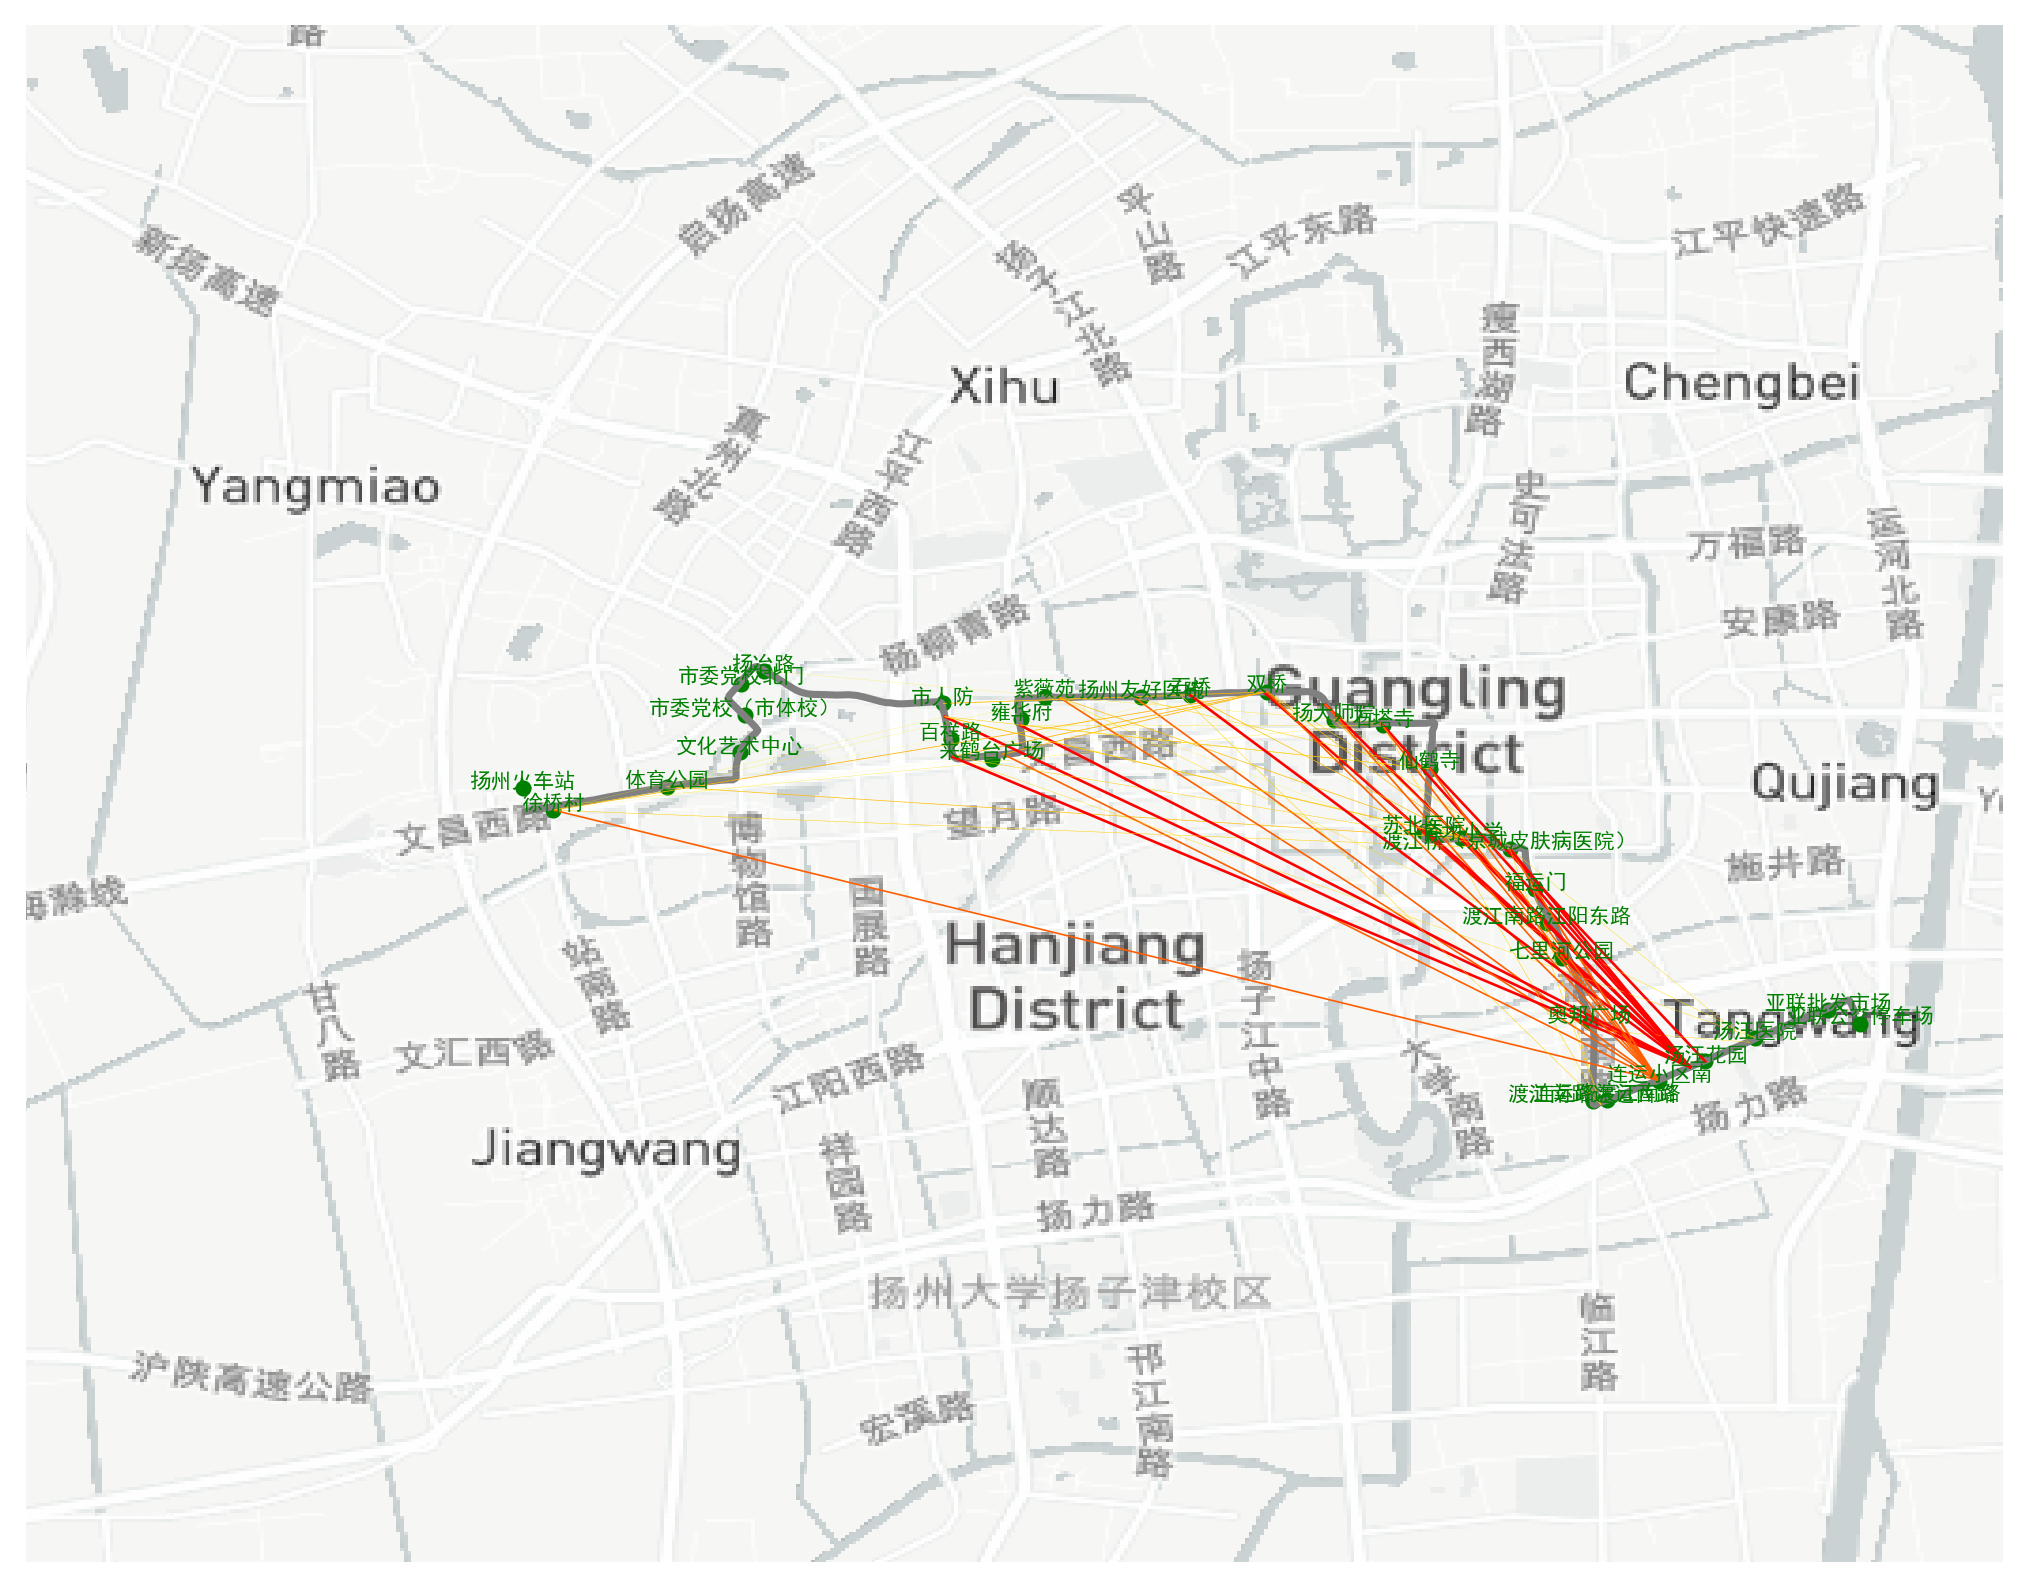

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
morning_data=data
district=district2 
fig     = plt.figure(1,(10,10),dpi =255)    
ax      = plt.subplot(111)
plt.sca(ax)
tbd.plot_map(plt,bounds=[118.4,32.2,119.8,32.5],zoom=12,style=4)   #设置底图
#绘制行政区划，底图为白色，边框为黑色，宽度为0.5
#hz.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0),linewidths=0.1)
 
import matplotlib

#设置colormap的数据
vmax = max(morning_data['OD'])
#设定一个标准化的工具，设定OD的colormap最大最小值，他的作用是norm(count)就会将count标准化到0-1的范围内
norm = mpl.colors.Normalize(vmin=0,vmax=vmax)
#设定colormap的颜色
cmapname = 'autumn_r'
#cmap是一个获取颜色的工具，cmap(a)会返回颜色，其中a是0-1之间的值
cmap = matplotlib.cm.get_cmap(cmapname)
 
#绘制OD

plt.plot(TIME['LONGITUDE'],TIME['LATITUDE'],color = 'grey',linewidth=2)
#p1=plt.scatter(TIME['LONGITUDE'],TIME['LATITUDE'],marker='.',s=5,color = 'grey')
for i in range(len(morning_data)):
    #设定第i条线的color和linewidth
    color_i=cmap(norm(morning_data['OD'].iloc[i]))
    linewidth_i=norm((morning_data['OD'].iloc[i])/morning_data['OD'].max())*20
    
    #绘制
    plt.plot([morning_data['O_x'].iloc[i],morning_data['D_x'].iloc[i]],
             [morning_data['O_y'].iloc[i],morning_data['D_y'].iloc[i]],
             color=color_i,linewidth=linewidth_i)
    
# 绘制假的colorbar，这是因为，我们画的OD是线，没办法直接画出来colorbar
# 所以我们在一个看不见的地方画了一个叫imshow的东西，他的范围是0到vmax
#然后我们再对imshow添加colorbar
plt.imshow([[0,vmax]], cmap=cmap)
#设定colorbar的大小和位置
#cax = plt.axes([0.01, 0.001, 0.01, 0.001])
#plt.colorbar(cax=cax)
district=district.drop_duplicates(subset=['STATIONNAME'],keep='first')
d=district['D_x']
e=district['D_y']
f=district['STATIONNAME']

#标注区域文字
for g,h,k in zip(d,e,f):
    plt.text(g,h,k,ha='center',rotation='0',fontsize=6,color='green')



p1=plt.scatter(d,e,marker='.',s=50,color = 'g')


#然后要把镜头调整回到杭州地图那，不然镜头就在imshow那里了
 
ax.set_xlim(119.3,119.48)
ax.set_ylim(32.32,32.46)
 

#import seaborn as sns
#fig     = plt.figure(1,(7,4),dpi = 250)    
#ax1      = plt.subplot(111)
plt.savefig(os.path.join(r'F:\data\扬州公交\手机信令梳理\5月6号\1001\站点OD\\'+str(checi)+'\\'+'站点OD流量'+str(m)+'.jpg'))

#plt.xticks(range(0,24*3600+1,3600),range(24+1))

#plt.xlim(0*3600,23*3600)
plt.axis('off')
plt.show()

#p1=plt.scatter(TIME['LONGITUDE'],TIME['LATITUDE'],marker='.',s=5,color = 'g')
#plt.show()
